<a href="https://colab.research.google.com/github/sajad95/Heat/blob/main/NunuvutWeatherDataAnalyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hi 

<img src="https://media.giphy.com/media/Vbtc9VG51NtzT1Qnv1/giphy.gif">

This is an IDE for weather files
## Lets Get Started


In [ ]:
!pip install pandas --quiet
import matplotlib.pyplot as plt
import pandas as pd
from dataclasses import dataclass
from google.colab import drive
import os
import numpy as np
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing, impute

plt.style.use("ggplot")
random_state=42
rng = np.random.default_rng(random_state)
drive.mount('/content/saj')

Mounted at /content/saj


In [ ]:
df = pd.read_csv('/content/saj/MyDrive/Technical report Miroslava Kavgic/Data Analysis Nunavut.csv')
df["Formatted Date"]= pd.to_datetime(df["Formatted Date"], errors='coerce', utc=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Formatted Date  8760 non-null   datetime64[ns, UTC]
 1   T2m             8760 non-null   float64            
 2   RH              8760 non-null   float64            
 3   G(h)            8760 non-null   float64            
 4   Gb(n)           8760 non-null   float64            
 5   Gd(h)           8760 non-null   float64            
 6   IR(h)           8760 non-null   float64            
 7   WS10m           8760 non-null   float64            
 8   WD10m           8760 non-null   int64              
 9   SP              8760 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(7), int64(2)
memory usage: 684.5 KB


In [ ]:
df.head(10)

Formatted Date    T2m     RH  G(h)  Gb(n)  Gd(h)   IR(h)  WS10m  \
0 2005-12-31 23:00:00+00:00 -25.38  77.42   0.0    0.0    0.0  168.40   6.82   
1 2006-01-01 00:00:00+00:00 -26.70  76.30   0.0    0.0    0.0  162.52   6.26   
2 2006-01-01 01:00:00+00:00 -28.02  75.17   0.0    0.0    0.0  156.64   5.71   
3 2006-01-01 02:00:00+00:00 -29.34  74.04   0.0    0.0    0.0  150.77   5.15   
4 2006-01-01 03:00:00+00:00 -30.66  72.91   0.0    0.0    0.0  144.89   4.59   
5 2006-01-01 04:00:00+00:00 -31.98  71.79   0.0    0.0    0.0  139.01   4.03   
6 2006-01-01 05:00:00+00:00 -33.30  70.66   0.0    0.0    0.0  133.13   3.47   
7 2006-01-01 06:00:00+00:00 -34.62  69.53   0.0    0.0    0.0  127.26   2.91   
8 2006-01-01 07:00:00+00:00 -31.50  69.65   0.0    0.0    0.0  148.65   4.97   
9 2006-01-01 08:00:00+00:00 -31.19  69.15   0.0    0.0    0.0  148.25   5.17   

   WD10m      SP  
0    311  100058  
1    304  100176  
2    297  100205  
3    285  100235  
4    256  100245  
5    236  100313  
6    228  100304  
7    225  100333  
8    226  100343  
9    227  100353

In [ ]:
df.describe()

T2m           RH        G(h)        Gb(n)        Gd(h)  \
count  8760.000000  8760.000000  8760.00000  8760.000000  8760.000000   
mean     -9.904001    76.784945   106.29460   135.095565    51.327900   
std      16.721854    11.790082   173.09752   246.619302    81.810862   
min     -46.250000    24.600000     0.00000     0.000000     0.000000   
25%     -24.990000    72.450000     0.00000     0.000000     0.000000   
50%      -9.520000    77.350000     0.20000     0.000000     0.200000   
75%       5.000000    85.150000   153.90000   145.795000    79.900000   
max      29.320000    99.950000   793.55000  1107.510000   485.850000   

             IR(h)        WS10m        WD10m             SP  
count  8760.000000  8760.000000  8760.000000    8760.000000  
mean    238.701642     5.385853   208.227169   99950.579795  
std      68.545059     2.552393   113.703062    1022.217660  
min     106.050000     0.070000     0.000000   96068.000000  
25%     176.400000     3.517500   127.000000   99311.000000  
50%     245.775000     5.030000   209.000000   99930.000000  
75%     294.650000     6.970000   319.000000  100657.000000  
max     386.800000    15.860000   360.000000  102731.000000

In [ ]:

num_col = ["T2m","RH","G(h)","Gb(n)","Gd(h)","IR(h)",'WS10m','WD10m','SP']
df.isna().sum()

Formatted Date    0
T2m               0
RH                0
G(h)              0
Gb(n)             0
Gd(h)             0
IR(h)             0
WS10m             0
WD10m             0
SP                0
dtype: int64

# Exploratory Data Analysis

<img src="https://media.giphy.com/media/3og0IExSrnfW2kUaaI/giphy.gif">

## First Question should be why do we need this ??

Out Come of this phase is as given below : 

- Understanding the given dataset and helps clean up the given dataset.
- It gives you a clear picture of the features and the relationships between them.
- Providing guidelines for essential variables and leaving behind/removing non-essential variables.
- Handling Missing values or human error.
- Identifying outliers.
- EDA process would be maximizing insights of a dataset.
- This process is time-consuming but very effective,

# First we start with checking for missing values :

Missing values are not always due to sore problem, they can have conceptual meaning to a particular feature , no meaninig for some features, 
```python
%timeit df.isnull().any().any()
46.2 ms ± 899 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
%timeit df.isnull().values.any()
44.6 ms ± 731 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
%timeit df.isna().values.any()
41.8 ms ± 229 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
%timeit np.isnan(df.values).any()
41.3 ms ± 368 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
```

We will come back to this in some time

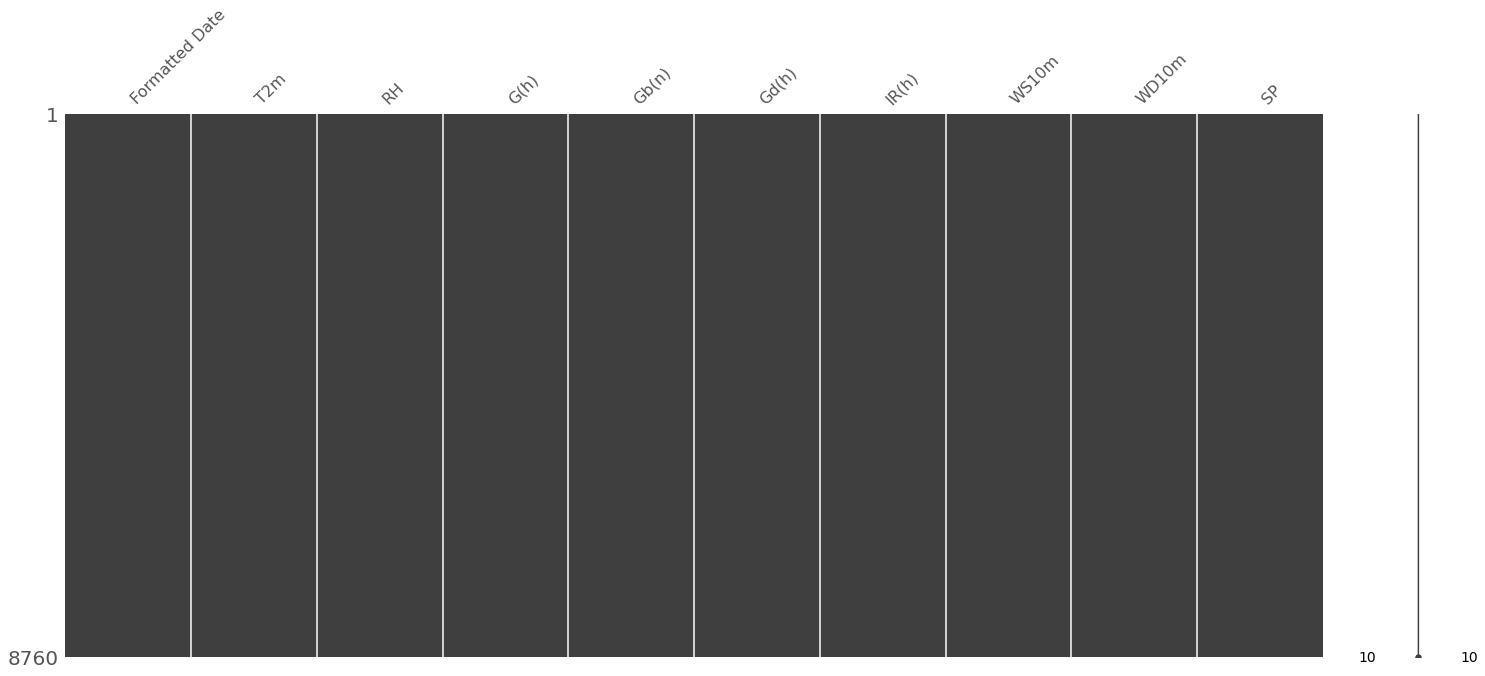

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()

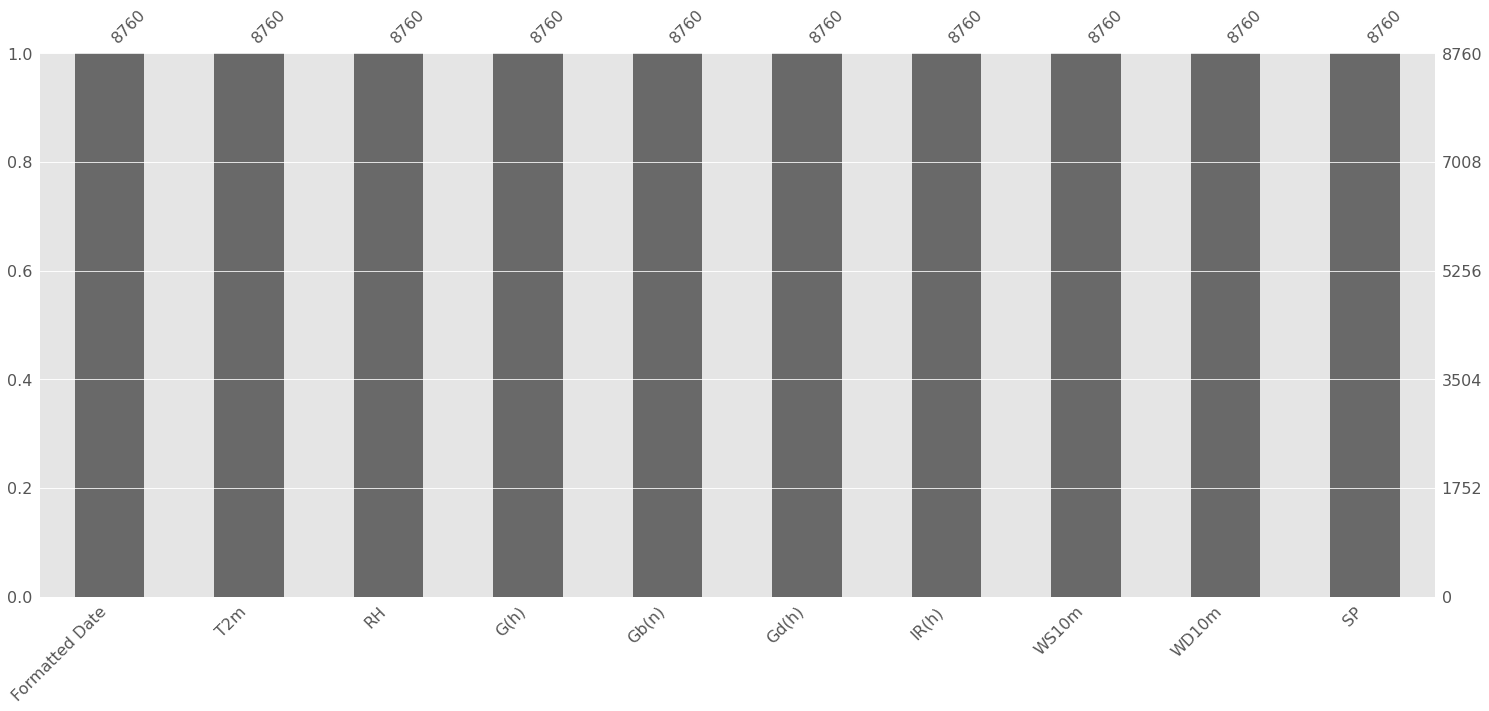

In [ ]:
msno.bar(df)
plt.show()

A heatmap is a graphical representation where individual values of a matrix are represented as colors. A heatmap is very useful in visualizing the concentration of values between two dimensions of a matrix. This helps in finding patterns and gives a perspective of depth

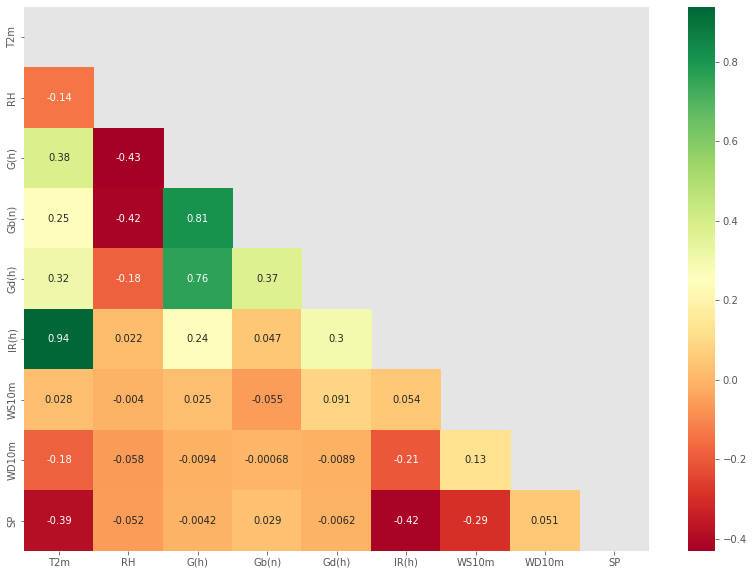

In [ ]:
## Feature Interactions:
plt.figure(figsize = (14,10))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),cmap="RdYlGn",mask = mask,annot=True)
plt.show()

In [ ]:
print(df.apply(lambda x: x.nunique()))
df.describe().T.style.background_gradient(
    vmin=-1, vmax=1, cmap=sns.color_palette("vlag", as_cmap=True))

Formatted Date    8760
T2m               4529
RH                1311
G(h)              3443
Gb(n)             3589
Gd(h)             2834
IR(h)             1819
WS10m              362
WD10m              361
SP                 593
dtype: int64


## Plotting out tabular data Always looks better to the eyes, to the heart and to our logical thinking as well. 😏

In [ ]:
def annotate_plot(plots):
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=15, xytext=(0,8),
                       textcoords='offset points')

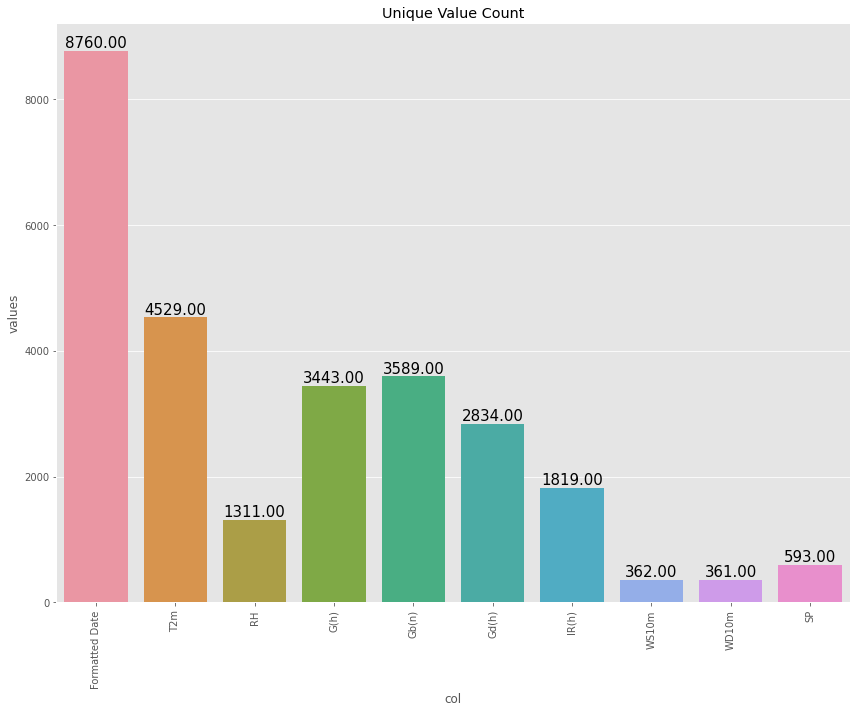

In [ ]:
plt.figure(figsize=(12,10))
unique_df = pd.DataFrame(df.apply(lambda x: x.nunique()))
unique_df = unique_df.reset_index()
unique_df.columns = ["col","values"]
g = sns.barplot(x="col",data = unique_df, y= "values")
annotate_plot(g)
plt.xticks(rotation=90)
plt.title("Unique Value Count")
plt.tight_layout()
plt.show()

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


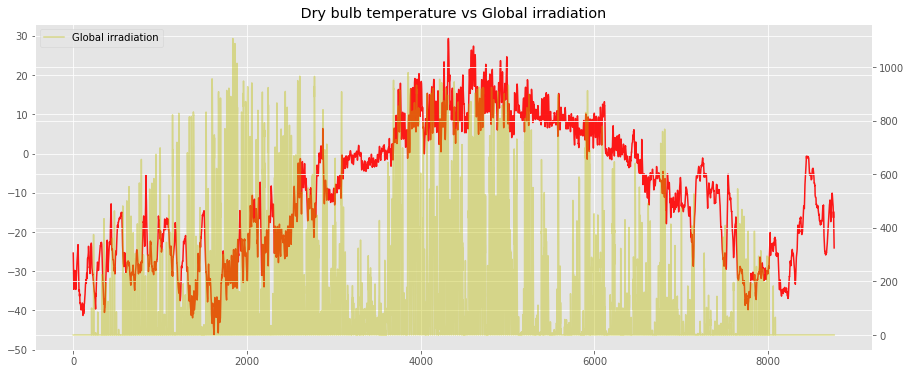

In [ ]:
y1 =df['T2m']
y2 =df['RH']
y3 = df['Gb(n)']
x_ax = range (len(df['T2m']))
fig, ax1 = plt.subplots(figsize=(15,6))
ax2 = ax1.twinx()
ax1.plot(x_ax, y1, 'r-' ,alpha = 0.9 , label = 'Dry bulb temperature' )
ax2.plot(x_ax, y3, 'y-', alpha = 0.4 , label = 'Global irradiation')
plt.title(" Dry bulb temperature vs Global irradiation ")
plt.legend(loc='upper left')#Upper right , 
plt.show()

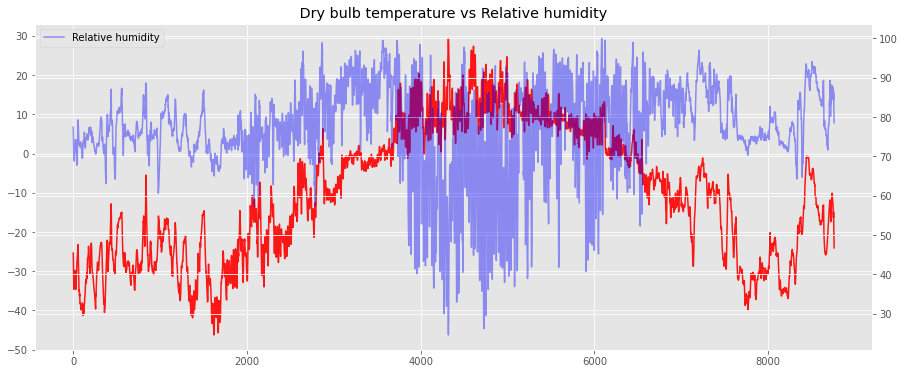

In [ ]:
y1 =df['T2m']
y2 =df['RH']
y3 = df['Gb(n)']
x_ax = range (len(df['T2m']))
fig, ax1 = plt.subplots(figsize=(15,6))
ax2 = ax1.twinx()
ax1.plot(x_ax, y1, 'r-' ,alpha = 0.9 , label = 'Dry bulb temperature' )
ax2.plot(x_ax, y2, 'b-', alpha = 0.4 , label = 'Relative humidity')
plt.title(" Dry bulb temperature vs Relative humidity ")
plt.legend(loc='upper left')#Upper right , 
plt.show()

# Understanding Data Using Some Statistics: 

<img src= "https://media.giphy.com/media/9ADoZQgs0tyww/giphy.gif">

Okay so dont worry we are not going to take a deep dive in statistics here, So In Statistics, QQ(Quantile Quantile) Plot plays a very vital role to graphically analyse and compare two probability distributions by plotting there quantiles agains each other. If the two distributions whic we have compaired are exactly equal then the points on the QQ plot will form a perfect straight line y=x.

It is very important for us to know weather our data is normal or not so as to apply various statistical measures on the data and interpret it in much more human understandable visualization and there Q-Q Plot comes into the picture.The most fundamental question answered by QQ-q plot out data normally ditributed


<img src = "https://i.stack.imgur.com/NpI0O.png">

This is how a Normally Distributed Q-Q Plot looks like much like a straight line Y=X.

## Now must be asking why the heck do we need our data to be Normally Distributed?

QQ plot are used to find the type of distribution for a random variable weather it be a Gaussian Disribution, Uniform Distribution , Exponential Distribution . We can tell the type of distribution just by looking at the QQ plot. In general we are talking about Normal Distribution as it works the best while fitting data to our ML model. And when we have a normal distribution of data we have some properties of our data such as we know the first standard deviation, second std. deviation of our data.


**Q-Q plots** take your sample data, sort it in ascending order, and then plot them versus quantiles calculated from a theoretical distribution. The number of quantiles is selected to match the size of your sample data. While Normal Q-Q Plots are the ones most often used in practice due to so many statistical methods assuming normality, Q-Q Plots can actually be created for any distribution


## Now comes the part when we get some understanding from our QQ plots.

Now we will focus on the ends of the straight line. If the points at the ends of the curve formed from the points are not falling on a straight line but indeed are scattered significantly from the positions then we cannot conclude a relationship between the x and y axes which clearly signifies that our ordered values which we wanted to calculate are not Normally distributed.
Just like out plots of ***Humidity , Wind , Wind Bending , Visibility*** which are not a complete straight line.

These Plots which are called **Skewed Q-Q Plots :**

When we plot theoretical quantiles on the x-axis and the sample quantiles whose distribution we want to know on the y-axis then we see a very peculiar shape of a Normally distributed Q-Q plot for skewness. If the bottom end of the Q-Q plot deviates from the straight line but the upper end is not, then we can clearly say that the distribution has a longer tail to its left or simply it is left-skewed (or negatively skewed) but when we see the upper end of the Q-Q plot to deviate from the straight line and the lower and follows a straight line then the curve has a longer till to its right and it is right-skewed (or positively skewed).

We Have some more type of QQplot which is **Tailed QQ Plots :**

like : ***Temperature , Apparent Temperature***



So we did all this observation to get an understanding of which type of preprcessing technique to appply on our data to make our data normal, which in turn helps out machine Learning model to give better prediction


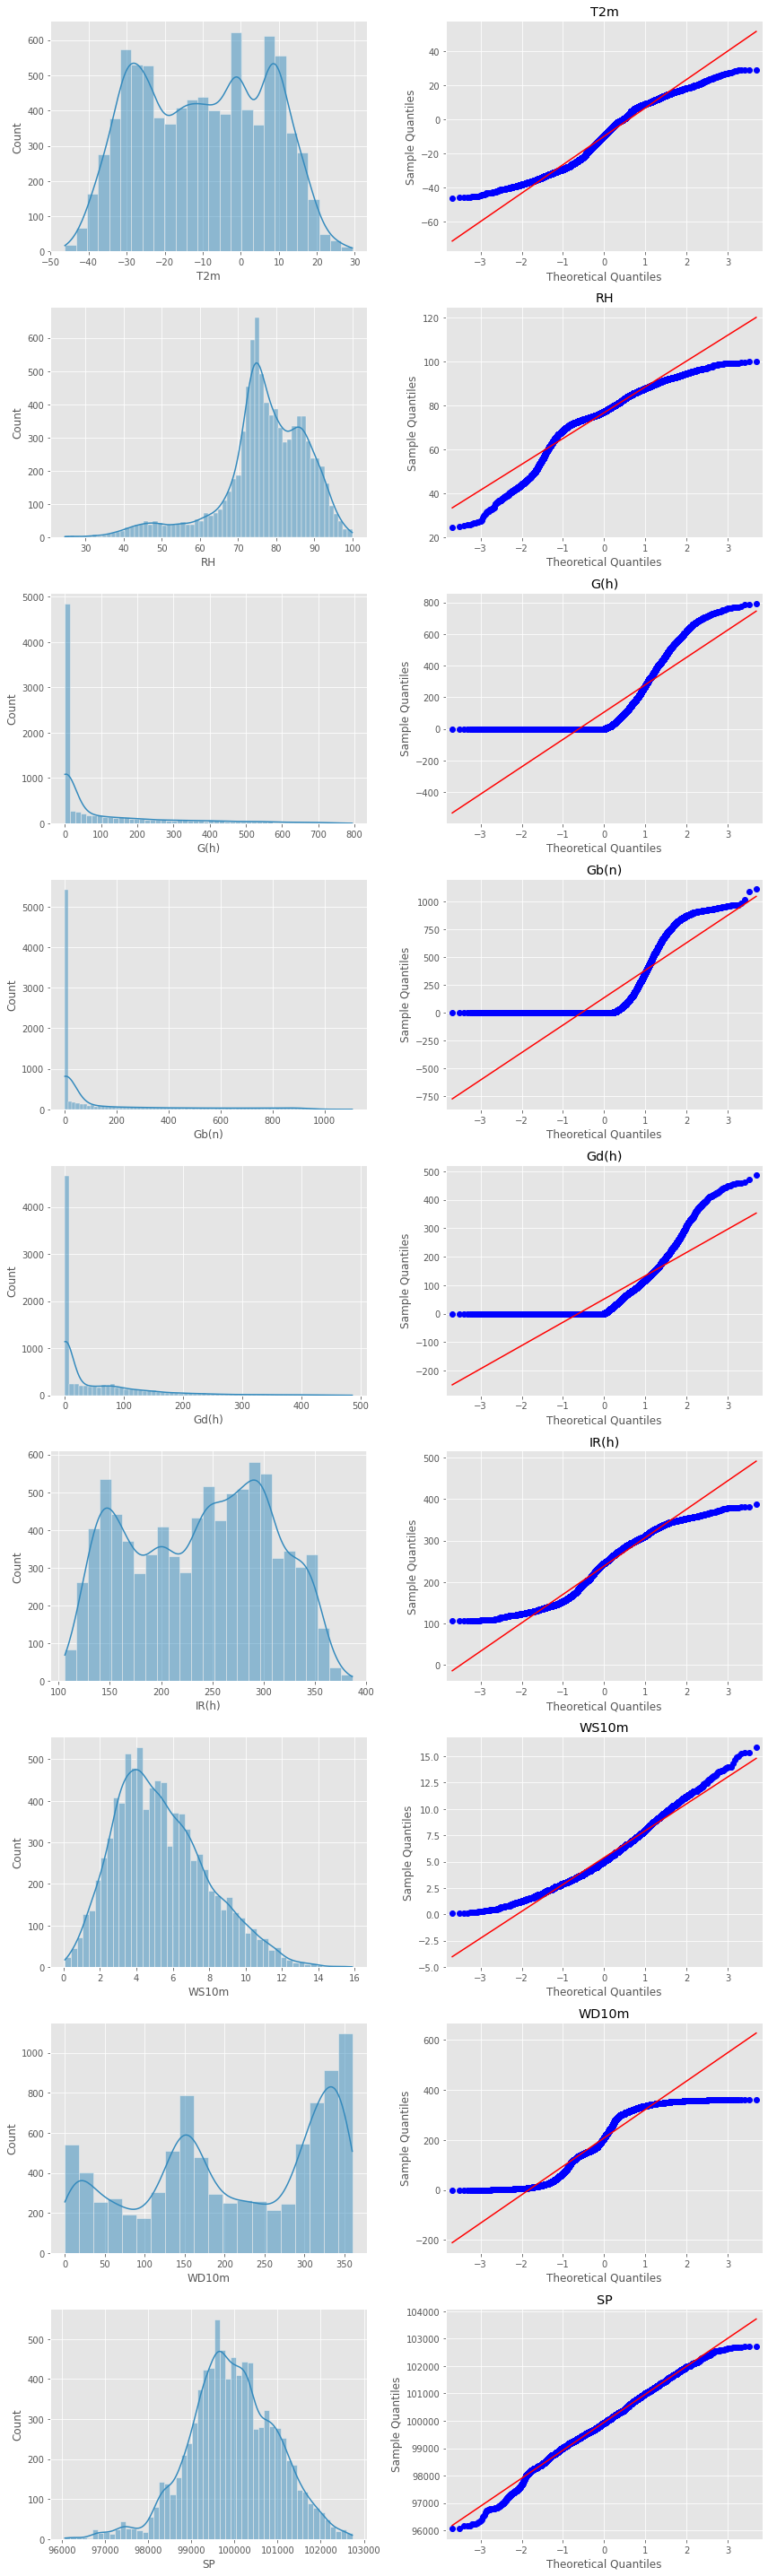

In [ ]:
fig,axes = plt.subplots(len(num_col),2,figsize=(12, len(df.columns)*4))
for i, col in enumerate(num_col):
    sns.histplot(df[col], ax = axes[i,0],kde =True)
    sm.qqplot(df[col].dropna(),line = "s",fmt = "b",ax = axes[i,1])
    axes[i, 1].set_title(col)

plt.tight_layout()
plt.show()

So now, we have seen the QQ plot some of the plots seems to a lot deviating of the desired for of distribution, we can start with applying log transformation on the features which are skewed. As a start and try to look for various distribution which can be helpfull for overcomming the skewness and Tialed characteristcs of the distribution,

In [ ]:
def scale_data(X):
    inv_sigmoid = lambda x: np.log(x / (1-x))
    
    X = X.copy()
    for col in num_col:
        X[col] = preprocessing.minmax_scale(X[col], feature_range=(0+1e-6, 1-1e-6))
        X[col] = X[col].apply(inv_sigmoid)
    X[num_col] = preprocessing.power_transform(X[num_col])
    #X['loudness'] = X['loudness'].apply(lambda x: np.log1p(-x))
    return X
df_scaled = scale_data(df)

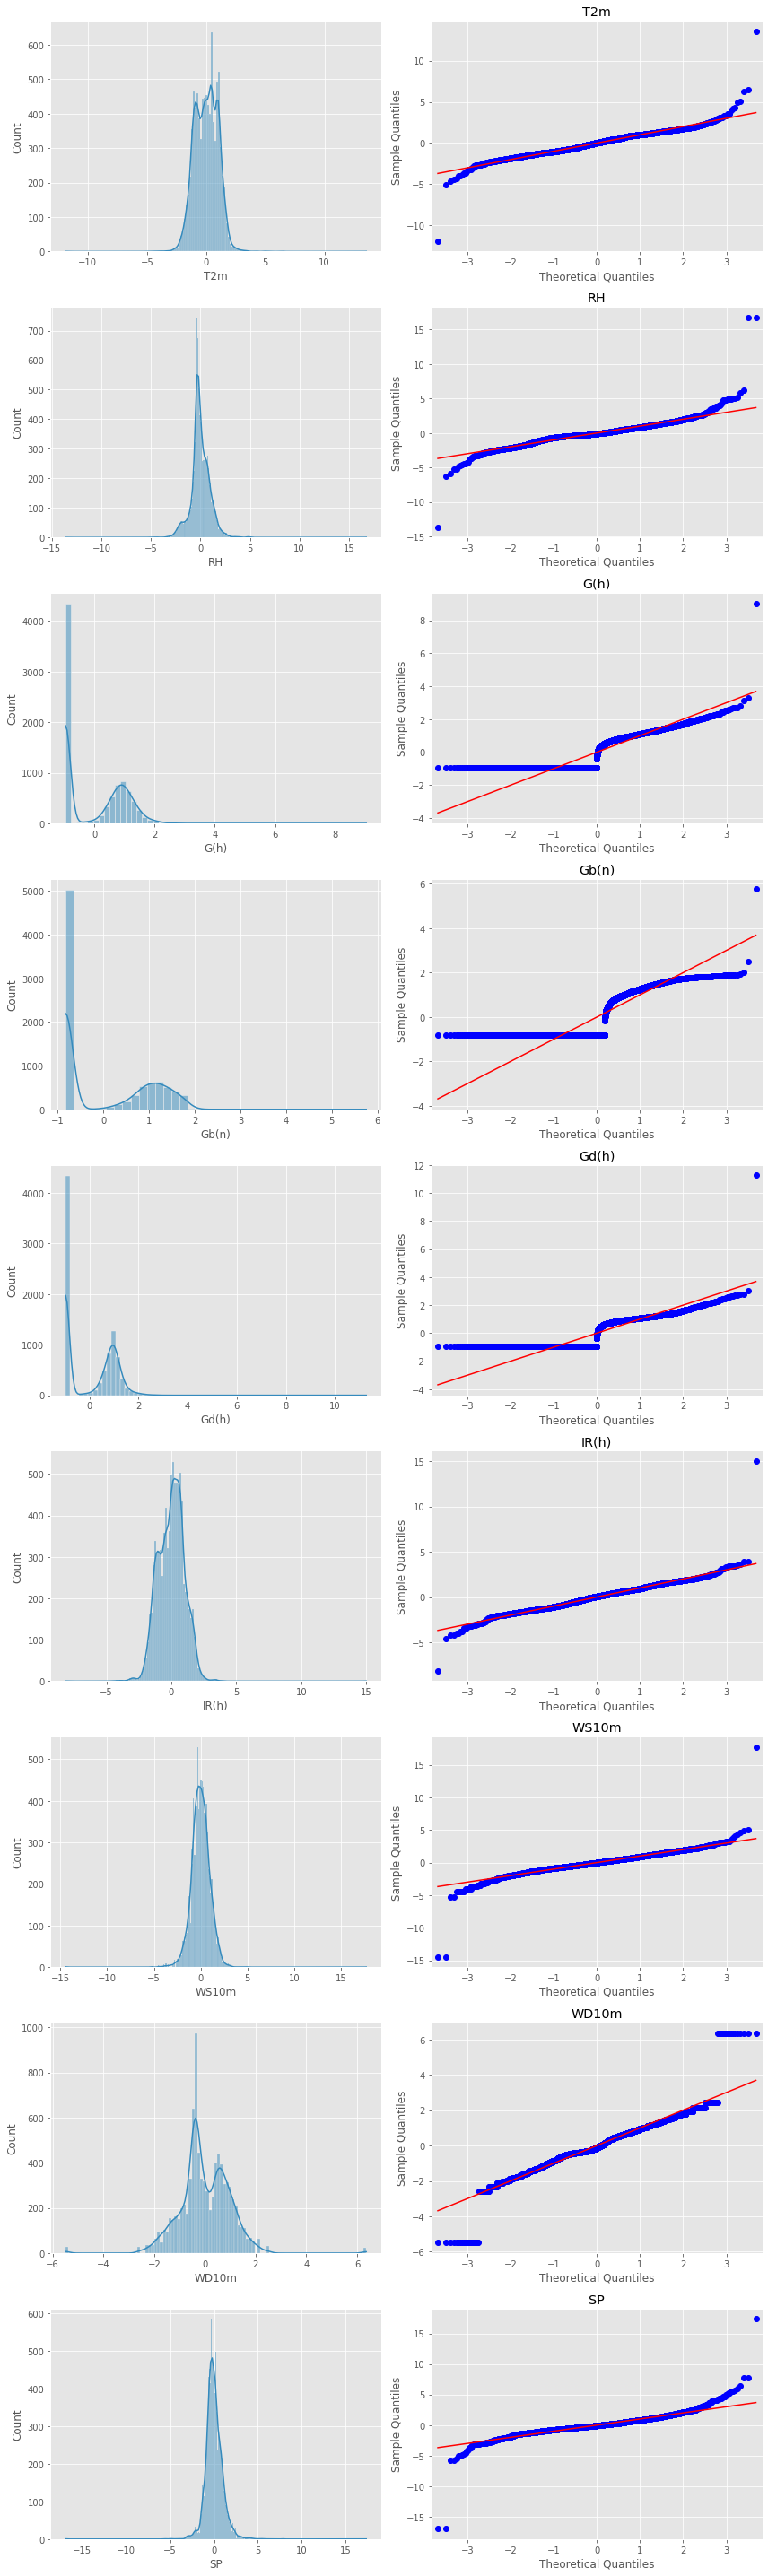

In [ ]:
fig,axes = plt.subplots(len(num_col),2,figsize=(12, len(df.columns)*4))
for i, col in enumerate(num_col):
    sns.histplot(df_scaled[col], ax = axes[i,0],kde =True)
    sm.qqplot(df_scaled[col].dropna(),line = "s",fmt = "b",ax = axes[i,1])
    axes[i, 1].set_title(col)

plt.tight_layout()
plt.show()

# Now New Question What to do with the data 

### What is Normalization?

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

Here's the fromula for normalization : 

<img src="https://i.stack.imgur.com/EuitP.png" width=40%>

Here, Xmax and Xmin are the maximum and the minimum values of the feature respectively.

When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0
On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1
If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1

## What is Standardization?

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation

Here's the formula for Standarization:

<img src="https://clavelresearch.files.wordpress.com/2019/03/z-score-population.png" width=30%>

## The Big Question – Normalize or Standardize?

Normalization vs. standardization is an eternal question among machine learning newcomers. Let me elaborate on the answer in this section.

- Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

- Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. 

### Robust Scaler
When working with outliers we can use Robust Scaling for scakling our data,
It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range. 
The median and the interquartile range are then stored so that it could be used upon future data using the transform method. If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance. 
RobustScaler uses the interquartile range so that it is robust to outliers

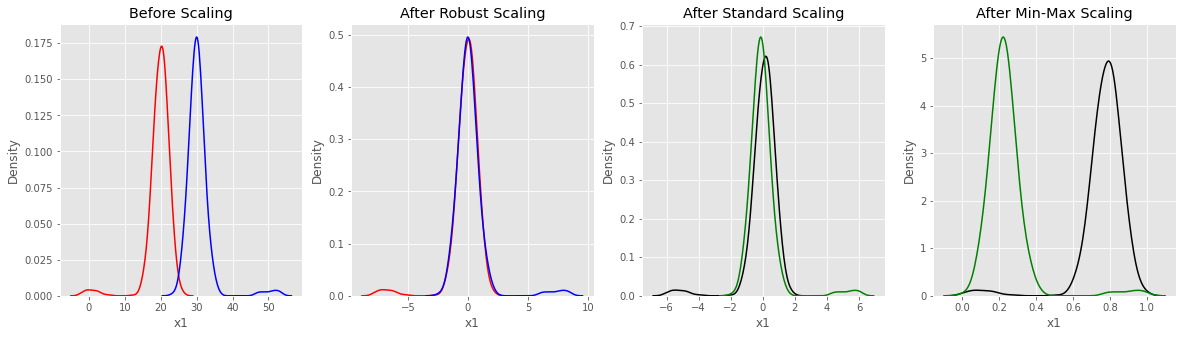

In [ ]:
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal
 
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])
 
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])
 
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])
 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

As we can see now our distribution if mostly Normalised and is ready to be used for processing and out ML model

# Cluster Map

## Your Question here should be What is Clustering?

Clustering is basically grouping data based on relationships among the variables in the data.  Clustering algorithms help in getting structured data in unsupervised learning. The most common types of clustering are shown below.

<img src= "https://media.geeksforgeeks.org/wp-content/uploads/20201123104401/Untitleddesign1.png">

Here we are going to see hierarchical clustering especially Agglomerative(bottom-up) hierarchical clustering. In Agglomerative clustering, we start with considering each data point as a cluster and then repeatedly combine two nearest clusters into larger clusters until we are left with a single cluster. The graph we plot after performing agglomerative clustering on data is called Dendrogram

## Plotting Hierarchically clustered Heatmaps

Coming to the heat map, it is a graphical representation of data where values are represented using colors. Variation in the intensity of color depicts how data is clustered or varies over space.

The clustermap() function of seaborn plots a hierarchically-clustered heat map of the given matrix dataset. It returns a clustered grid index. 

If we take an example of the [Flights](https://github.com/mwaskom/seaborn-data/blob/master/flights.csv) Dataset : 


```python
# Importing the library
import seaborn as sns
from sunbird.categorical_encoding import frequency_encoding
  
# Load dataset
data = sns.load_dataset('flights')
  
# Categorical encoding
frequency_encoding(data, 'month')
  
# Clustering data row-wise and
# changing color of the map.
sns.clustermap(data, figsize=(7, 7))
```

**Output :**

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20201126143308/e1.png">

The legend to the left of the cluster map indicates information about the cluster map e.g bright color indicates more passengers and dark color indicates fewer passengers.

```python
# Importing the library
import seaborn as sns
from sunbird.categorical_encoding import frequency_encoding
  
# Load dataset
data = sns.load_dataset('flights')
  
# Categorical encoding
frequency_encoding(data, 'month')
  
# Clustering data row-wise and
# changing color of the map.
sns.clustermap(data, cmap='coolwarm', figsize=(7, 7))
```

**Output :**

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20201126143656/e2.png">


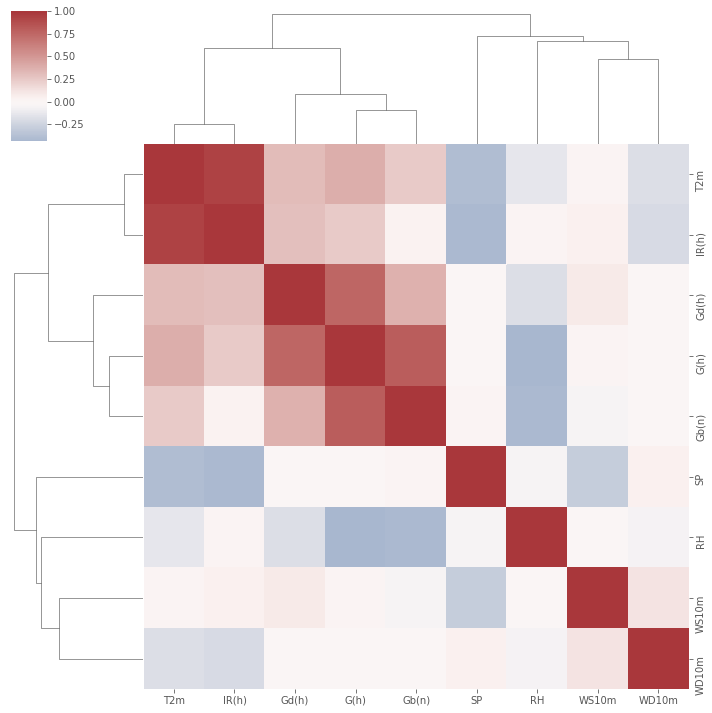

In [ ]:
sns.clustermap(df.corr(), center=0, cmap="vlag")

# PCA (Principle Component Analysis) : 

Many Machine Learning problems involve thousands or even millions of features for each training instance. Not only does this make training extremely slow, it can also make it much harder to find a good solution, as we will see. This problem is often referred to as *the curse of dimensionality*. Fortunately, in real-world problems, it is often possible to reduce the number of features considerably, turning an intractable problem into a tractable one. For example, consider the MNIST images the pixels on the image borders are almost always white, so you could completely drop these pixels from the training set without losing much information. Moreover, two neighboring pixels are often highly correlated, if you merge them into a single pixel (e.g., by taking the mean of the two pixel intensities), you will not lose much information

**THE CURSE OF DIMENTIONALITY**

<img src="https://media.giphy.com/media/xT9DPPHKfbz58057OM/giphy.gif">

>***Reducing dimensionality does lose some information (just like compressing an image to JPEG can degrade its quality), so even though it will speed up training, it may also make your system perform slightly worse. It also makes your pipelines a bit more complex and thus harder to maintain. So you should first try to train your system with the original data before considering using dimensionality reduction if training is too slow. In some cases, however, reducing the dimensionality of the training data may filter out some noise and unnecessary details and thus result in higher performance (but in general it won’t; it will just speed up training)***

# So Why to do PCA in for DataViz must be you Question :

Apart from speeding up training, dimensionality reduction is also extremely useful for data visualization (or DataViz). Reducing the number of dimensions down to two (or three) makes it possible to plot a condensed view of a high-dimensional training set on a graph and often gain some important insights by visually detecting patterns, such as clusters. Moreover, DataViz is essential to communicate your conclusions to people who are not data scientists, in particular decision makers who will use your results




In [ ]:
from sklearn.decomposition import PCA

pca = PCA(random_state=random_state).fit(df_scaled[num_col])

X_pca = pd.DataFrame(pca.transform(df[num_col]), index=df_scaled.index)

pca_comp = pd.DataFrame(pca.components_, index=num_col)
pca_comp.style.background_gradient(
    vmin=-1, vmax=1, cmap=sns.color_palette("vlag", as_cmap=True))

In [ ]:
!pip uninstall umap
!pip install umap-learn
import umap.umap_ as umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 4.7 MB/s 
     |████████████████████████████████| 1.1 MB 56.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=6ad05c4109df5f7cd37ee6cfdd428984c680d830cab59086565a8b672f510134
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=0fc57ca2cff0d786f5ebc3a8d0a847eff6455669f0b1f760f12c94697418a1f2
  Stored in directory: /root/.cache/pip/wheels/19/bc/eb/974072a56a7082a302f8b4be1ad6d21bf5019235c2eff65928
Successfully built umap-learn pynndescent


In [ ]:
!pip install datashader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.2 MB 108 kB/s 
     |████████████████████████████████| 76 kB 5.7 MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59439 sha256=9fe779260abf396ff84da927a74683aa904a569c9d7b04d2c56a1a7fbbacf44f
  Stored in directory: /root/.cache/pip/wheels/b5/b7/80/333a5c3312ed4cd54f5d5b869868c14e0c6002cb5c7238b52d
Successfully built datashape


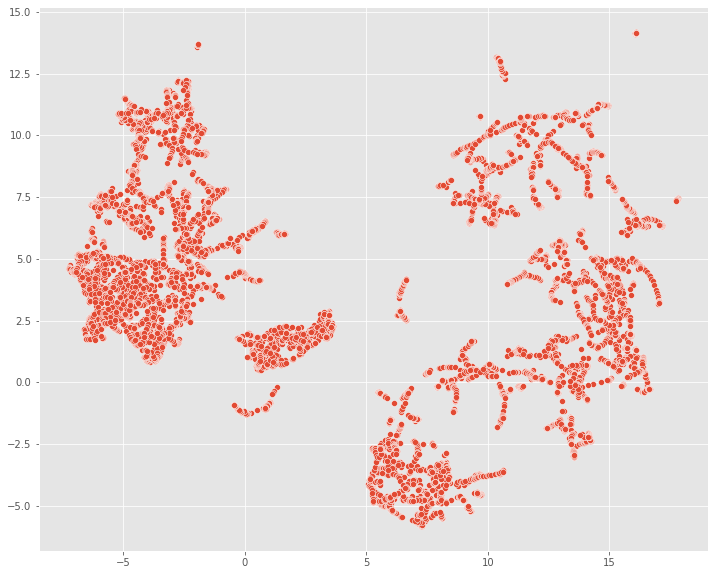

In [ ]:
from umap import UMAP
import umap.plot
from sklearn.manifold import TSNE
plt.figure(figsize=(12,10))
proj = UMAP().fit_transform(df_scaled[num_col])
sns.scatterplot(x=proj[:, 0], y=proj[:, 1])
plt.show()

Here we can see the distribution of Precip Type in our complete data, it seems fairly easy to look and tell using these techniques which part of our data point will will have rain or snow.

# One of the Most Usefull Plot: 
Yes it is what you already knew PairPlot

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.


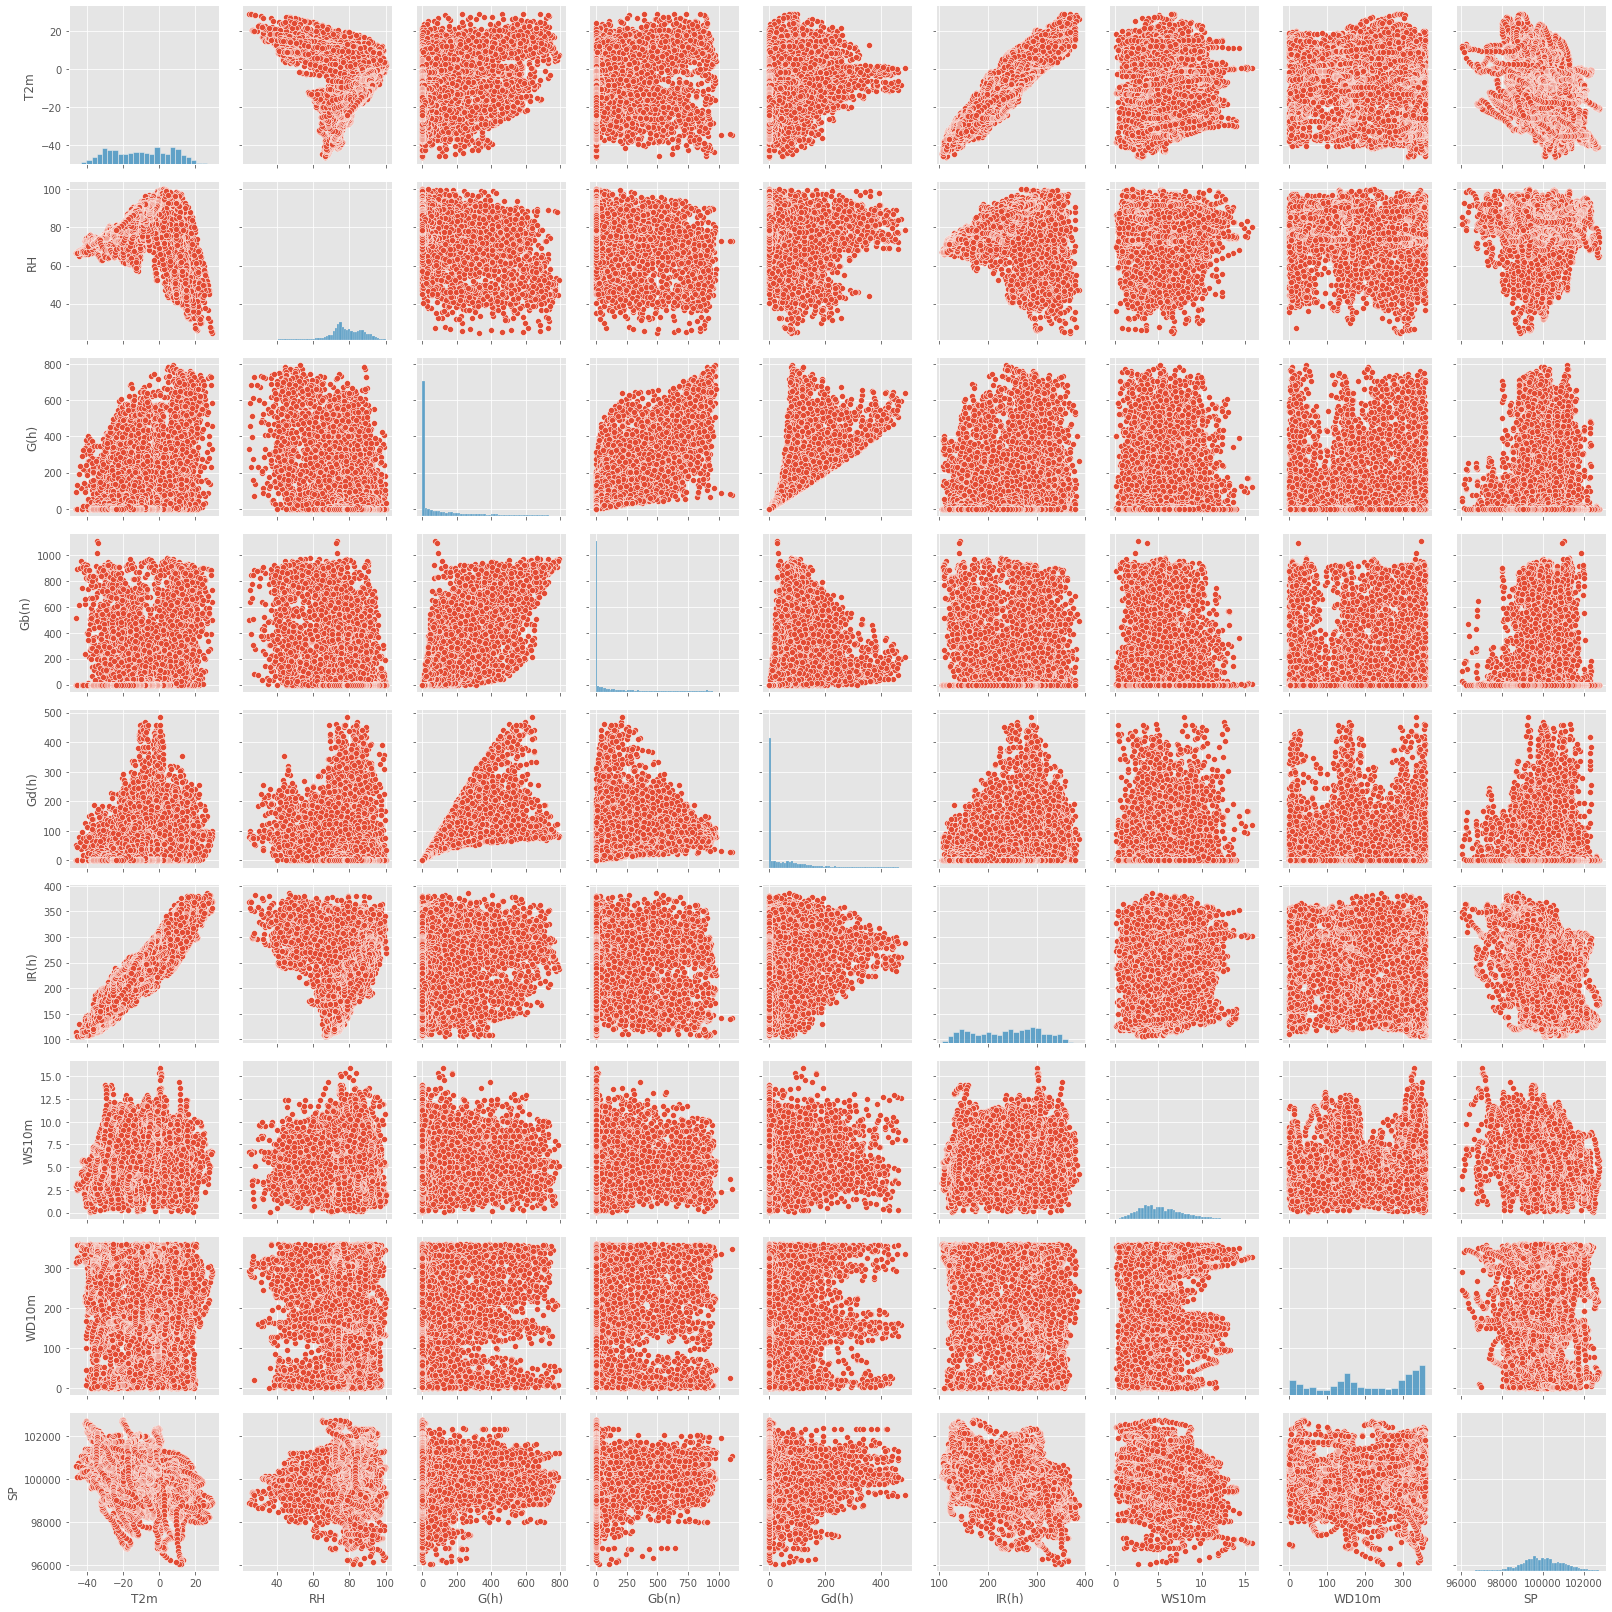

In [ ]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

In [ ]:
def create_distplot(data_,color_,col_name):
    from scipy import stats
    sns.set(font_scale=1.5)
    fig = plt.figure(figsize=(12,10))
    sns.distplot(data_ , color = color_, fit=stats.norm)
    plt.title(f'Distribution of {col_name}')

    # Get the fitted parameters used by sns
    (mu, sigma) = stats.norm.fit(data_.dropna())
    print("mu={0}, sigma={1}".format(mu, sigma))

    # Legend and labels 
    plt.legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
    plt.ylabel('Frequency')

    # Cross-check this is indeed the case - should be overlaid over black curve
    x_dummy = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 100)
    plt.plot(x_dummy, stats.norm.pdf(x_dummy, mu, sigma))
    plt.legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma),
            "cross-check"])
    plt.box(False)
    plt.show()

mu=76.78494520547945, sigma=11.789408734431928


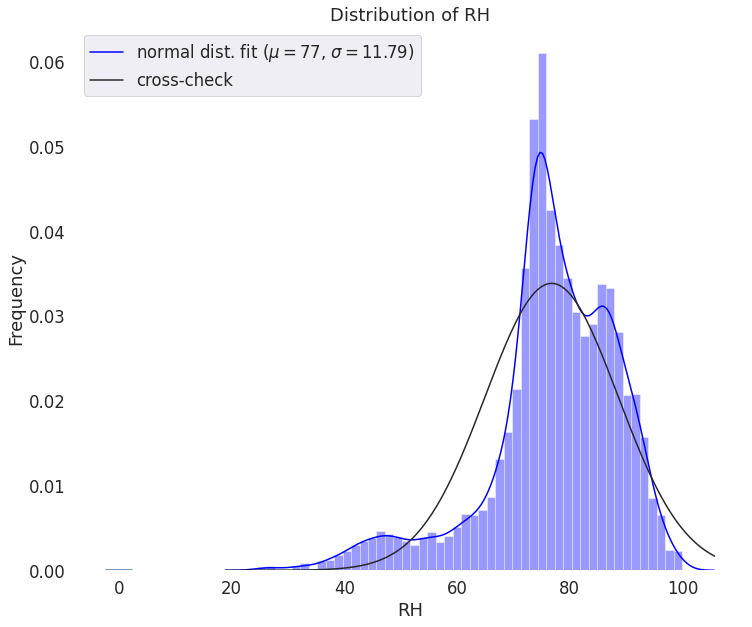

In [ ]:
plot_t = num_col[1]
create_distplot(df[plot_t],"blue",plot_t)

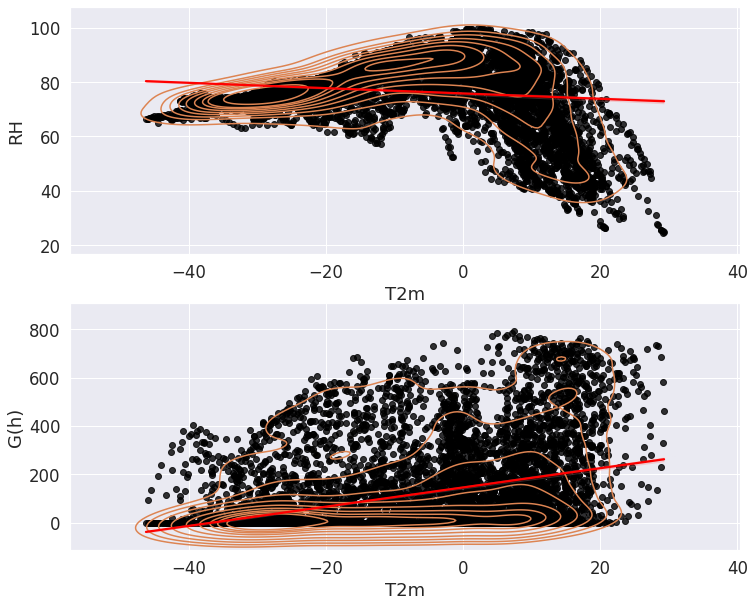

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.regplot(data=df , x="T2m",y="RH" ,scatter_kws={"color": "black"}, line_kws={"color": "red"} )
sns.kdeplot(data =df , x="T2m",y="RH")
plt.subplot(2,1,2)
sns.regplot(data=df , x="T2m",y="G(h)",scatter_kws={"color": "black"}, line_kws={"color": "red"} )
sns.kdeplot(data =df , x="T2m",y="G(h)")
plt.show()

In [ ]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

https://engineering.99x.io/time-series-forecasting-in-machine-learning-3972f7a7a467

In [ ]:
df = df.set_index('Formatted Date')
df.index = pd.to_datetime(df.index)

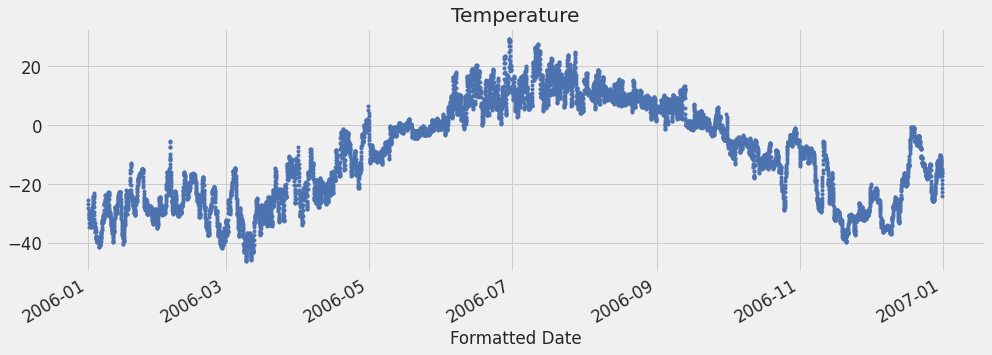

In [ ]:
df['T2m'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Temperature')
plt.show()

Lets see 7 days with mre details

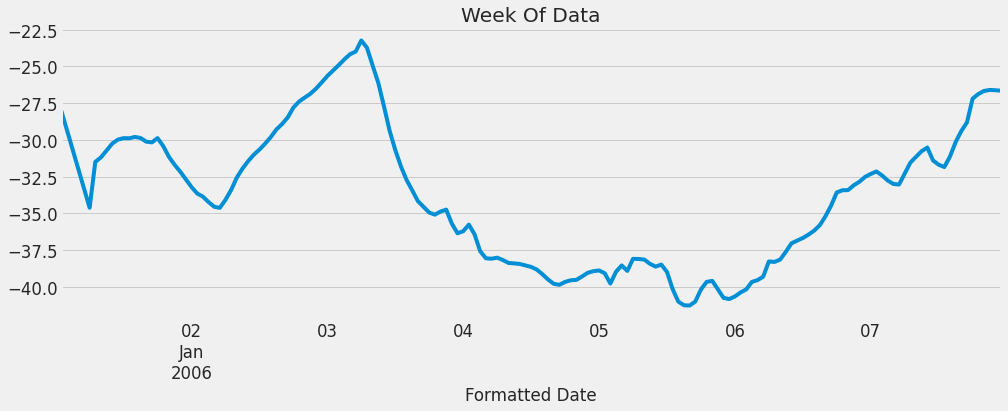

In [ ]:
df['T2m'].loc[(df.index > '01-01-2006') & (df.index < '01-08-2006')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

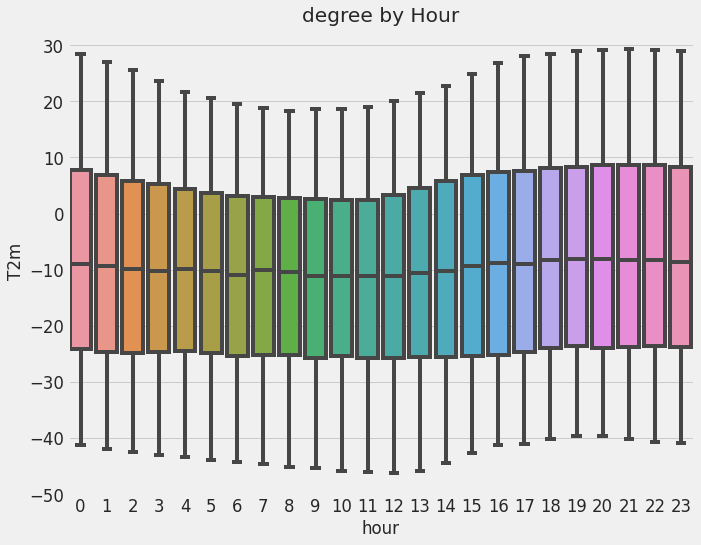

In [ ]:

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='T2m')
ax.set_title('degree by Hour')
plt.show()

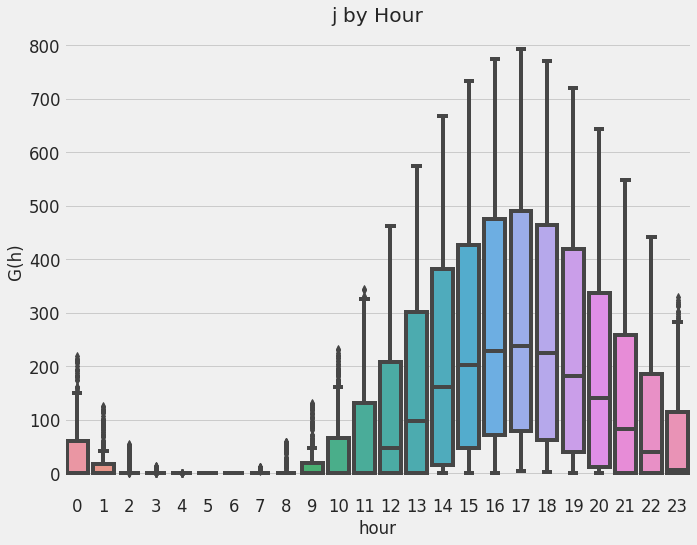

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='G(h)')
ax.set_title('j by Hour')
plt.show()

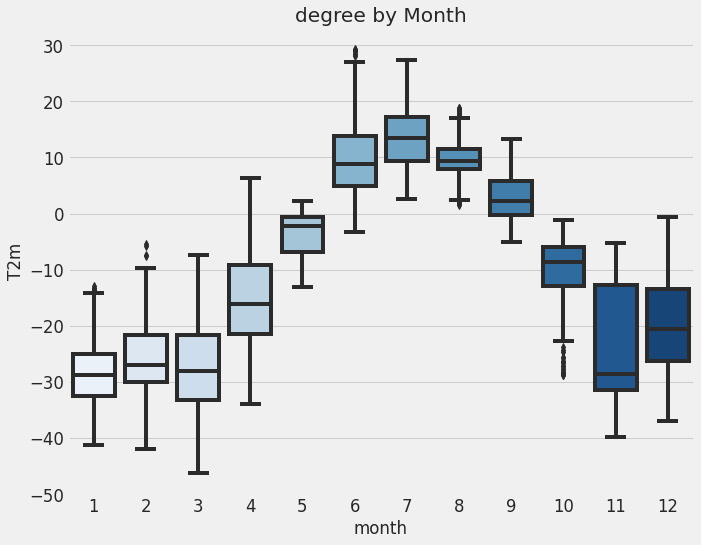

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='T2m', palette='Blues')
ax.set_title('degree by Month')
plt.show()

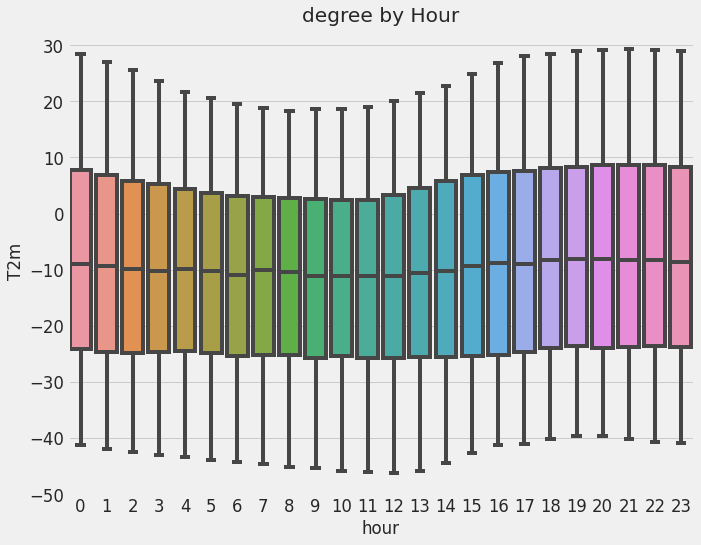

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='T2m')
ax.set_title('degree by Hour')
plt.show()

In [ ]:
plt.ion()
y1 = df.iloc[:,8]

In [ ]:
df.head(4)

T2m     RH  G(h)  Gb(n)  Gd(h)   IR(h)  WS10m  \
Formatted Date                                                               
2005-12-31 23:00:00+00:00 -25.38  77.42   0.0    0.0    0.0  168.40   6.82   
2006-01-01 00:00:00+00:00 -26.70  76.30   0.0    0.0    0.0  162.52   6.26   
2006-01-01 01:00:00+00:00 -28.02  75.17   0.0    0.0    0.0  156.64   5.71   
2006-01-01 02:00:00+00:00 -29.34  74.04   0.0    0.0    0.0  150.77   5.15   

                           WD10m      SP  hour  dayofweek  quarter  month  \
Formatted Date                                                              
2005-12-31 23:00:00+00:00    311  100058    23          5        4     12   
2006-01-01 00:00:00+00:00    304  100176     0          6        1      1   
2006-01-01 01:00:00+00:00    297  100205     1          6        1      1   
2006-01-01 02:00:00+00:00    285  100235     2          6        1      1   

                           year  dayofyear  dayofmonth  weekofyear  
Formatted Date                                                      
2005-12-31 23:00:00+00:00  2005        365          31          52  
2006-01-01 00:00:00+00:00  2006          1           1          52  
2006-01-01 01:00:00+00:00  2006          1           1          52  
2006-01-01 02:00:00+00:00  2006          1           1          52

In [ ]:
y1

Formatted Date
2005-12-31 23:00:00+00:00    100058
2006-01-01 00:00:00+00:00    100176
2006-01-01 01:00:00+00:00    100205
2006-01-01 02:00:00+00:00    100235
2006-01-01 03:00:00+00:00    100245
                              ...  
2006-12-31 18:00:00+00:00     98820
2006-12-31 19:00:00+00:00     98849
2006-12-31 20:00:00+00:00     98889
2006-12-31 21:00:00+00:00     98977
2006-12-31 22:00:00+00:00     99006
Name: SP, Length: 8760, dtype: int64

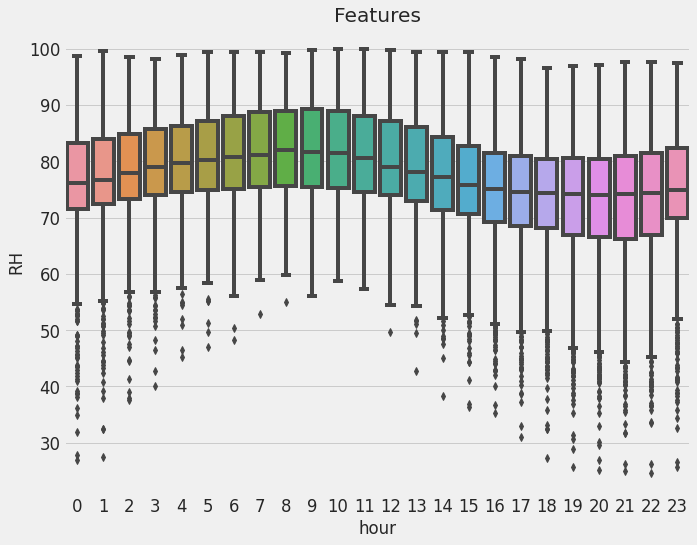

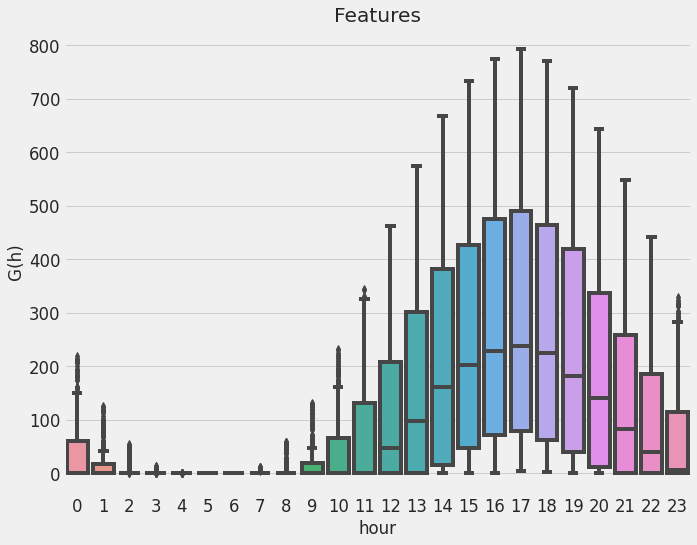

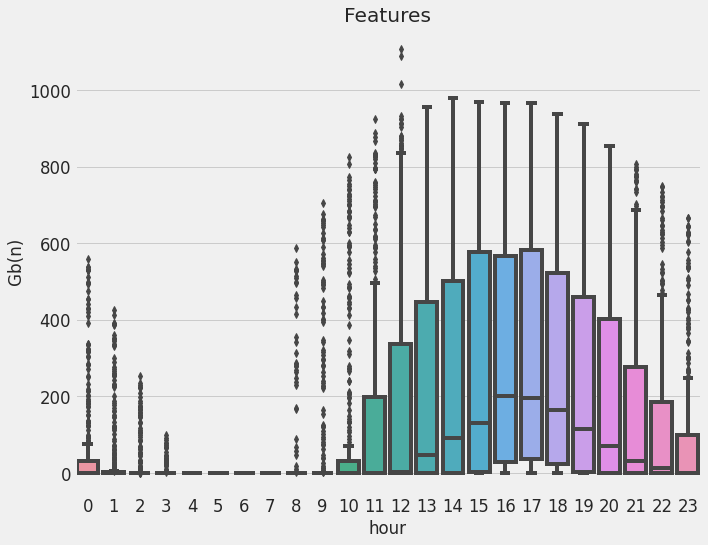

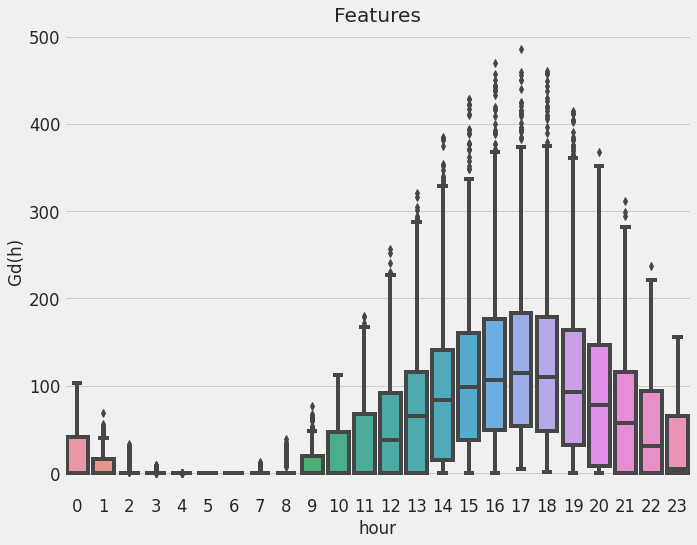

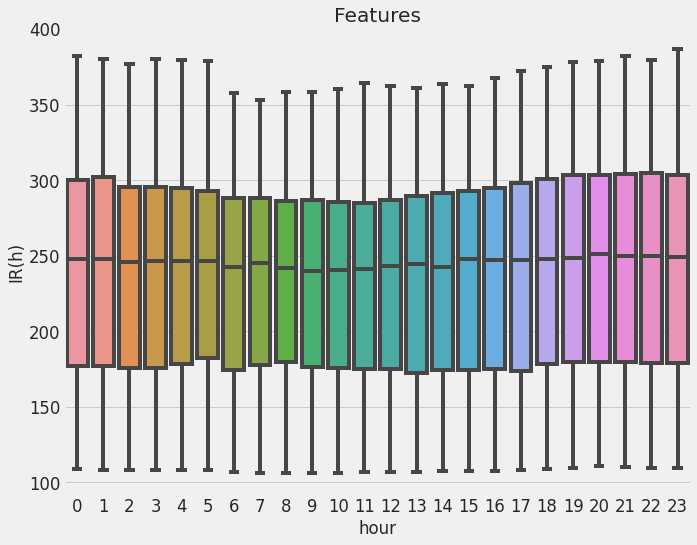

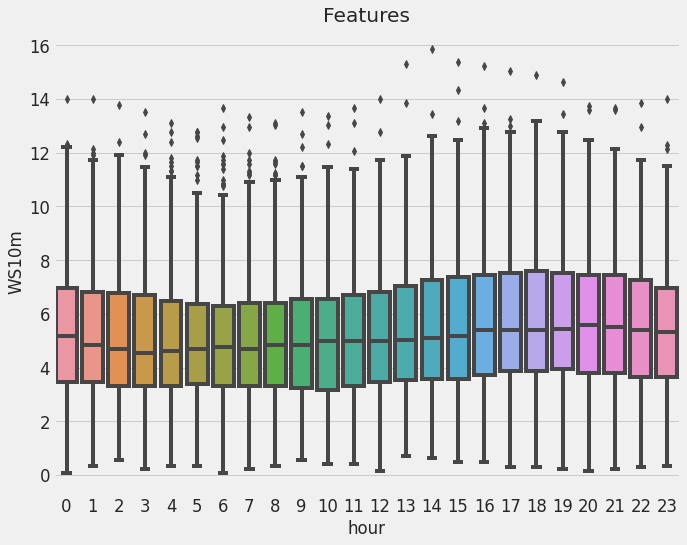

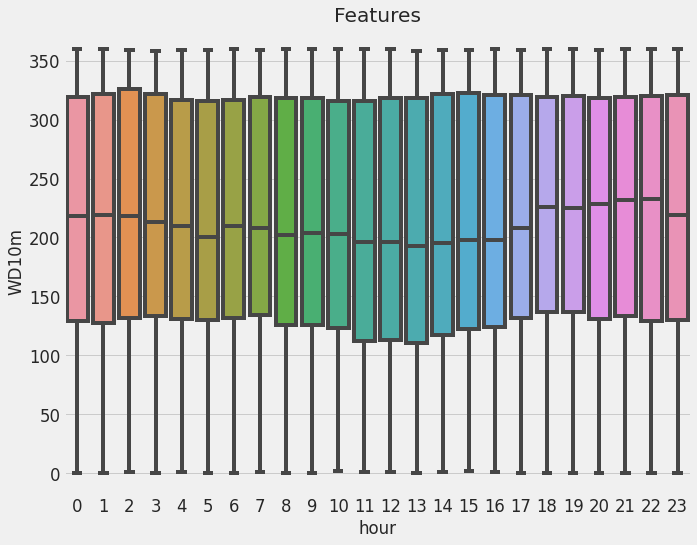

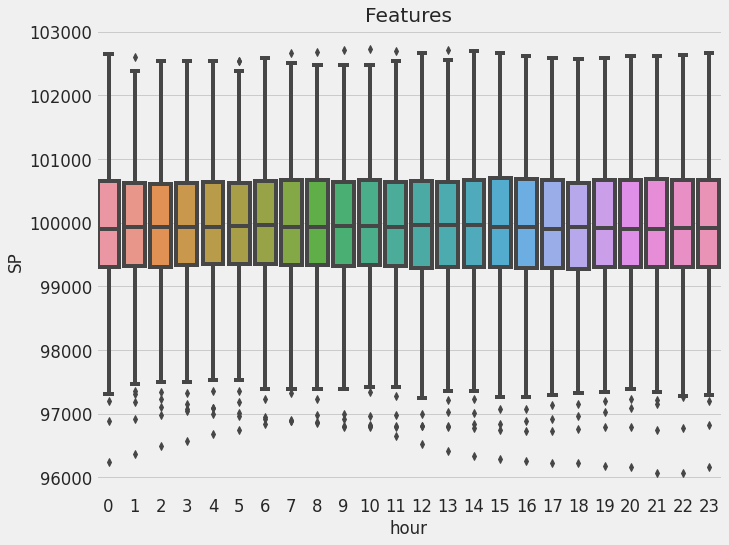

In [ ]:
plt.ion()
#y1 = df.iloc[:,8] if you had ywo columns you could use this 
A = list(df)
for i in range(8):
  x_ax = range (len(df['T2m']))
  y= df.iloc[:,i+1]
  fig, ax = plt.subplots(figsize=(10, 8))
  sns.boxplot(data=df, x='hour', y =  df.iloc[:,i+1] )
  ax1.plot(x_ax, y, 'b-', alpha = 0.6 , label = A [i])
  plt.title("Features")
  plt.show()



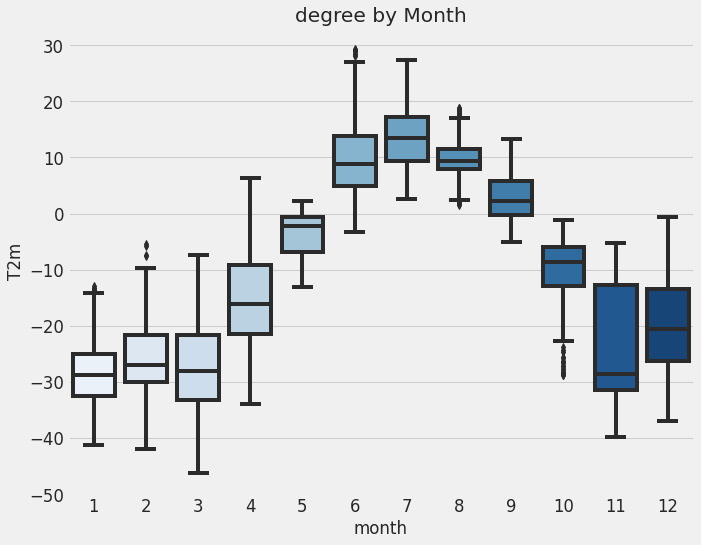

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='T2m', palette='Blues')
ax.set_title('degree by Month')
plt.show()

In [ ]:
HDD_BASE_TEMP = 18
df.T2m.apply(lambda T2m: max((HDD_BASE_TEMP - T2m)/24, 0))

Formatted Date
2005-12-31 23:00:00+00:00    1.8075
2006-01-01 00:00:00+00:00    1.8625
2006-01-01 01:00:00+00:00    1.9175
2006-01-01 02:00:00+00:00    1.9725
2006-01-01 03:00:00+00:00    2.0275
                              ...  
2006-12-31 18:00:00+00:00    1.5325
2006-12-31 19:00:00+00:00    1.5875
2006-12-31 20:00:00+00:00    1.6425
2006-12-31 21:00:00+00:00    1.6975
2006-12-31 22:00:00+00:00    1.7525
Name: T2m, Length: 8760, dtype: float64

In [ ]:
CDD_BASE_TEMP = 20
df.T2m.apply(lambda T2m: max((T2m - CDD_BASE_TEMP)/24, 0))

Formatted Date
2005-12-31 23:00:00+00:00    0.0
2006-01-01 00:00:00+00:00    0.0
2006-01-01 01:00:00+00:00    0.0
2006-01-01 02:00:00+00:00    0.0
2006-01-01 03:00:00+00:00    0.0
                            ... 
2006-12-31 18:00:00+00:00    0.0
2006-12-31 19:00:00+00:00    0.0
2006-12-31 20:00:00+00:00    0.0
2006-12-31 21:00:00+00:00    0.0
2006-12-31 22:00:00+00:00    0.0
Name: T2m, Length: 8760, dtype: float64